In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from langdetect import detect_langs , detect
from textblob import TextBlob
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
from sklearn.feature_extraction.text import  CountVectorizer
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('master_dataset.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
print('total reviews:',len(df))
df.head()

total reviews: 454427


,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,address,postal_code,city,state,NAICS,label,word_count,Lang
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,1 Boggs Ave,15211.0,Pittsburgh,PA,Accommodation and Food Services,1,295,en
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,342 Island Ave,15136.0,McKees Rocks,PA,Accommodation and Food Services,1,138,en
2,Gyrez6K8f1AyR7dzW9fvAw,qm97yMwREr7BKkexlwLFbg,their pettuccine was fresh-made in the morning...,5,1,12/28/13 22:28,0,0,TTRVdTXKcq-xn6-1IWbwEw,Casanova,"3377 S Las Vegas Blvd, Ste 2170",89109.0,Las Vegas,NV,Accommodation and Food Services,1,33,en
3,CDpoJiqgM04wqQTZ6QkTqQ,CelUWzp-GnJIiiV1mDUb-g,Love this place downtown but the Scottsdale lo...,1,0,12/5/15 2:37,0,0,tFICmdLtwgFIRcwtlbYQOg,Squid Ink,"7318 E Shea Blvd, Ste 101",85260.0,Scottsdale,AZ,Accommodation and Food Services,0,34,en
4,3JxKzWquEbPC3yPIfoCiLw,hUUfzKeDLo930LA9-v2tWQ,Best chinese resto. Highly recommended. 5 star...,5,0,3/7/16 1:03,0,0,uFVAAe0JC81IPmxgT49Hcw,Eest Asian Bistro,"3145 N Dysart Rd, Ste C102",85392.0,Avondale,AZ,Accommodation and Food Services,1,27,en


### Clean Text

In [3]:
df1 = df.copy()
df1['text'] = df1['text'].str.replace('\n','')

In [4]:
df2 = df1.copy()
df2['clean_text'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['clean_text'] = df2['clean_text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [5]:
nltk.download('wordnet')
stop = stopwords.words('english')
stop.extend(['yelp', 'www','biz photo','yelp com biz','www yelp','biz photo','com biz','biz','yr','http','ac'
             ,'au','asu','az','bc','br'])
df2['clean_text'] = df2['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df2['clean_text2'] = df2['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [7]:
print(df2['text'][3])
print(df2['clean_text'][3])
print(df2['clean_text2'][3])

Love this place downtown but the Scottsdale location has no manners. Sat at bar for 10 min while bartender ignored us. No menu, no water. We walked out and they could have cared less.
love place downtown scottsdale location manners sat bar min bartender ignored us menu water walked could cared less
love place downtown scottsdale location manner sat bar min bartender ignored u menu water walked could cared le


### Create Postive and Negative Review Column

In [8]:
df2['new_label'] = np.where(df2['stars'] > 3, 1, 0)
df2.tail(3)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,postal_code,city,state,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label
454424,9U4Tqt5SkZKQ6eeH6IPSxQ,9wyhNIwxEwyXv38NK7FJBg,Yummy food and great service. Fresh fish and d...,5,0,9/20/18 5:06,0,0,0Q4x4V3MYjm4yp0RjA-YKA,Ohjah Japanese Steakhouse,...,89108.0,Las Vegas,NV,Accommodation and Food Services,1,29,en,yummy food great service fresh fish delicious ...,yummy food great service fresh fish delicious ...,1
454425,OBvPj3NiXxt47fjsQ0edsQ,JHmgcQMJkfooh1mytiwk2A,This is the worst strip club I have ever been ...,1,0,4/15/17 10:52,0,1,m-RzWGOQFfUxyUhJJ_zeCQ,Crazy Horse 3 Gentlemen's Club,...,89118.0,Las Vegas,NV,Accommodation and Food Services,0,141,en,worst strip club ever three people went notice...,worst strip club ever three people went notice...,0
454426,Z_mJYg3vi8cPZHa1J4BALw,8ZGC9NVYpiFYTwpgtioxkQ,I have nothing but great things to say about t...,5,1,11/5/18 14:58,0,1,XYf0WzdysIojC2FxkjNStQ,Kindred Restaurant,...,28036.0,Davidson,NC,Accommodation and Food Services,1,104,en,nothing great things say restaurant brought de...,nothing great thing say restaurant brought dea...,1


### Lexicon under sample postive reviews 

In [9]:
df_0 = df2[df2['new_label'] == 0]
df_1 = df2[df2['new_label'] == 1]
df_under = df_1.sample(150000 ,random_state=19)
df_new = pd.concat([df_under, df_0], axis = 0)
############################
df_new = df_new.reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new["new_label"].value_counts()

1    150000
0     96569
Name: new_label, dtype: int64

In [10]:
df3 = df_new.copy()
df3.head(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,postal_code,city,state,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label
0,HOqtos5lUqV9x0MJbqwR1Q,X3_Yr4Uw4fjV0_IQh_f6VQ,"Great place! Love the relaxed atmosphere, pla...",4,0,12/30/14 14:56,0,0,wQ0yKCzbi4q4QB3Y6p5LKQ,Wine Warehouse,...,85255.0,Scottsdale,AZ,Accommodation and Food Services,1,17,en,great place love relaxed atmosphere place inte...,great place love relaxed atmosphere place inte...,1
1,7mU3l5VjH1IxsXcxBxUblg,6mQjs9WrdW0bmrXV3wvaug,I am so glad to have finally found good Mexica...,4,0,4/13/10 18:12,0,1,TkFcPIHDPx43OqnqZ_ElPQ,Emilliano's Mexican Restaurant and Bar,...,15203.0,Pittsburgh,PA,Accommodation and Food Services,1,79,en,glad finally found good mexican food pittsburg...,glad finally found good mexican food pittsburg...,1


In [11]:
c_vect2 = CountVectorizer(max_features=3000, stop_words='english', min_df = 10,max_df = 0.85, ngram_range={1,3})
x_count2 = c_vect2.fit_transform(df3['clean_text2'])

In [12]:
print(len(c_vect2.get_feature_names()))

3000


In [13]:
arr2 = x_count2.toarray()
df_count2 = pd.DataFrame(arr2, columns= c_vect2.get_feature_names())

In [14]:
lb2 = df3[['new_label']]
df26 = pd.concat([df_count2, lb2], axis = 1)
df26.tail()

,able,absolute,absolutely,absolutely amazing,absolutely delicious,absolutely love,acceptable,accommodate,accommodating,accompanied,...,yesterday,york,young,yuck,yum,yummy,zero,zero star,zucchini,new_label
246564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df26['new_label'].value_counts()

1    150000
0     96569
Name: new_label, dtype: int64

In [16]:
pos = df26.loc[df26['new_label'] == 1]

In [17]:
neg = df26.loc[df26['new_label'] == 0]

### Get Polarity Score of features

In [18]:
test3 = pd.DataFrame([], columns = ['word', 'pos_score', 'neg_score','polarityScore'])
for i in range(3000):
    ww = df26.columns[i]
    pos1 = pos[ww].sum()
    neg1 = neg[ww].sum()
    w = pos1/(pos1 + neg1)
    w2 = neg1/(pos1 + neg1)
    pol = (2 * w) - 1
    test3 = test3.append({'word':ww,'pos_score':w,'neg_score':w2,'polarityScore':pol}, ignore_index = True)

In [19]:
print(len(test3))
test3.tail(9)

3000


,word,pos_score,neg_score,polarityScore
2991,yesterday,0.429325,0.570675,-0.141350
2992,york,0.664915,0.335085,0.329831
2993,young,0.410533,0.589467,-0.178934
2994,yuck,0.067797,0.932203,-0.864407
2995,yum,0.909187,0.090813,0.818375
2996,yummy,0.909396,0.090604,0.818792
2997,zero,0.098089,0.901911,-0.803823
2998,zero star,0.005772,0.994228,-0.988456
2999,zucchini,0.629590,0.370410,0.259179


In [20]:
print('neg:', len(test3[test3['polarityScore'] < 0]))
print('pos:', len(test3[test3['polarityScore'] > 0]))

neg: 1088
pos: 1910


### Filter out neutral words

In [21]:
test4 = test3[(test3['pos_score'] <= 0.4) | (test3['pos_score'] > 0.60)]

In [22]:
print('neg:', len(test4[test4['polarityScore'] < 0]))
print('pos:', len(test4[test4['polarityScore'] > 0]))

neg: 648
pos: 1369


In [23]:
test_lex2 = test4[['word', 'polarityScore']]
test_lex2.set_index('word', inplace = True)
test_lex2.to_csv('lex_7000.csv')
test_lex2.head()

,polarityScore
word,
absolute,0.262782
absolutely,0.321997
absolutely amazing,0.906465
absolutely delicious,0.900775
absolutely love,0.800000


### Create Lexcion

In [24]:
lex2 = test_lex2.to_dict()['polarityScore']
lex2

{'absolute': 0.26278240190249713,
 'absolutely': 0.321996598979694,
 'absolutely amazing': 0.9064649243466301,
 'absolutely delicious': 0.9007751937984496,
 'absolutely love': 0.8,
 'acceptable': -0.6055172413793104,
 'accommodating': 0.629277566539924,
 'accompanied': 0.4157303370786516,
 'account': -0.4599018003273322,
 'acknowledge': -0.8064516129032258,
 'acknowledged': -0.7904564315352697,
 'act': -0.4237012987012987,
 'acted': -0.8609467455621302,
 'added': 0.21904761904761916,
 'addition': 0.44166666666666665,
 'address': -0.46178343949044587,
 'admit': 0.24891587163920215,
 'advantage': 0.2359882005899705,
 'advertised': -0.49431818181818177,
 'affordable': 0.8474046278924328,
 'aged': 0.26072607260726066,
 'agreed': -0.27245508982035926,
 'ahi': 0.36750272628135217,
 'aioli': 0.5726256983240223,
 'airport': 0.2659870250231695,
 'al': 0.3834688346883468,
 'al pastor': 0.5154320987654322,
 'alcoholic': 0.278688524590164,
 'ale': 0.5152394775036284,
 'almond': 0.5398230088495575,

### Create function to get mean polarity of review

In [25]:
def ngrams(input, n):
    input = input.split(' ')
    output = []
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    return output
def lex_score(y):
    splt = y.split()
    score = []
    for word in splt:
        if lex2.get(word) != None:
                val = lex2.get(word)
                score.append(val)
        else:
            pass
    gram_2 = [' '.join(x) for x in ngrams(y, 2)]   
    for word2 in gram_2:
        if lex2.get(word2) != None:
                val = lex2.get(word2)
                score.append(val)
        else:
            pass
    gram_3 = [' '.join(x) for x in ngrams(y, 3)]   
    for word3 in gram_3:
        if lex2.get(word3) != None:
                val = lex2.get(word3)
                score.append(val)
        else:
            pass
    if score == []:
        z = 0
        return(z)
    else:
        sc = np.mean(score)
        return(sc)

In [26]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report
def model_info(x, y):
    cm = confusion_matrix(x,y)
    acc = accuracy_score(x,y)
    rec = recall_score(x,y)
    rec_0 = recall_score(x,y, pos_label=0)
    data = [{"Accuracy":acc,"Specificity":rec_0, "Sensitivity":rec}]
    df = pd.DataFrame(data)
    return (df)

### Get mean polarity score for each review

In [27]:
df2['lex_score'] = df2['clean_text2'].apply(lex_score)

### Classification of reviews

In [28]:
df2['lex_label'] = np.where(df2['lex_score'] > 0,1,0)

,Accuracy,Specificity,Sensitivity
0,0.911123,0.631207,0.98666


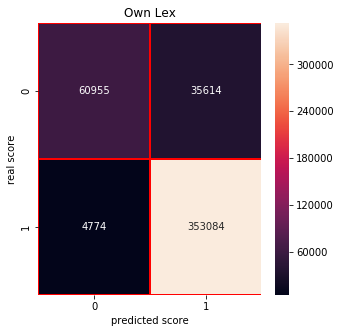

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(df2['new_label'], df2['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(df2['new_label'], df2['lex_label'])

In [30]:
df2.head(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,state,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label,lex_score,lex_label
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,...,PA,Accommodation and Food Services,1,295,en,first admit excited going la tavolta food snob...,first admit excited going la tavolta food snob...,1,0.228928,1
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,...,PA,Accommodation and Food Services,1,138,en,looking best pierogies pittsburgh place small ...,looking best pierogies pittsburgh place small ...,1,0.295957,1


In [31]:
len(df2[df2['lex_score'] == 0])

99

### Scale polarity between 0 and 100

In [32]:
def scale_score(x):
    sc = round(((x - (-1))/ (1 - (-1))) * 100,3)
    return(sc)

In [33]:
df2['scaled_score'] = df2['lex_score'].apply(scale_score)

In [34]:
df2.tail(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label,lex_score,lex_label,scaled_score
454425,OBvPj3NiXxt47fjsQ0edsQ,JHmgcQMJkfooh1mytiwk2A,This is the worst strip club I have ever been ...,1,0,4/15/17 10:52,0,1,m-RzWGOQFfUxyUhJJ_zeCQ,Crazy Horse 3 Gentlemen's Club,...,Accommodation and Food Services,0,141,en,worst strip club ever three people went notice...,worst strip club ever three people went notice...,0,-0.435893,0,28.205
454426,Z_mJYg3vi8cPZHa1J4BALw,8ZGC9NVYpiFYTwpgtioxkQ,I have nothing but great things to say about t...,5,1,11/5/18 14:58,0,1,XYf0WzdysIojC2FxkjNStQ,Kindred Restaurant,...,Accommodation and Food Services,1,104,en,nothing great things say restaurant brought de...,nothing great thing say restaurant brought dea...,1,0.417094,1,70.855


In [35]:
max(df2['scaled_score']),min(df2['scaled_score'])

(94.02, 2.847)

In [36]:
df2['scaled_score'].mean()

63.21990102260488

### Mean Socre for all reviews

In [37]:
print('Accommodation and Food Services:',round(df2['scaled_score'].mean(),3) )

Accommodation and Food Services: 63.22


### Use min-max scaling to scale polarity between 0 and 100

In [38]:
def min_max_score(x, minn = 0,maxx = 0):
    sc = round(((x - minn)/ (maxx - minn))* 100,3)
    return(sc)

In [39]:
max(df2['lex_score']),min(df2['lex_score'])

(0.8803984663930483, -0.943060516153672)

In [40]:
df2['min_max_score'] = df2['lex_score'].apply(min_max_score,minn = -0.943060516153672, maxx = 0.8803984663930483 )

In [41]:
max(df2['min_max_score']),min(df2['min_max_score'])

(100.0, 0.0)

In [42]:
df2['min_max_score'].mean()

66.21802463541972

### Comparing Scaled Scores 

In [43]:
print('-1 to 1 Scale')
print('Accommodation and Food Services:',round(df2['scaled_score'].mean(),3) )
print('Min Max Scale')
print('Accommodation and Food Services:',round(df2['min_max_score'].mean(),3) )

-1 to 1 Scale
Accommodation and Food Services: 63.22
Min Max Scale
Accommodation and Food Services: 66.218
